In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Merge_Country_Data as merge

In [2]:
usData = pd.read_csv('../Data/YouTube/cleaned_us.csv')
usData['trending_date'] = '20' + usData['trending_date']
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


## Longest Trending Videos (# of days)

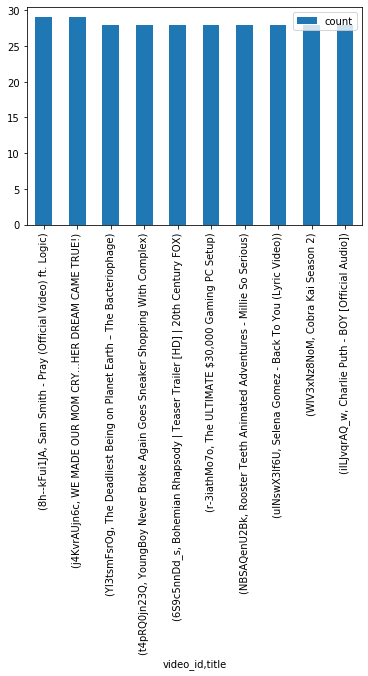

In [12]:
top = usData.groupby(['video_id', 'title'])
top10 = pd.DataFrame({},columns=['count'])
top10['count'] = top['trending_date'].count().sort_values(ascending=False).head(10)
top10.plot.bar()

## Avergage Trening video amount of time trending

In [5]:
usData['video_id'].value_counts().mean()

6.440088175090537

On average in the US a video will trend for 6 days

In [6]:
usData['trending_date'] = pd.to_datetime(usData['trending_date'],format='%Y.%d.%m')

In [7]:
usData.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category                          object
dtype: object

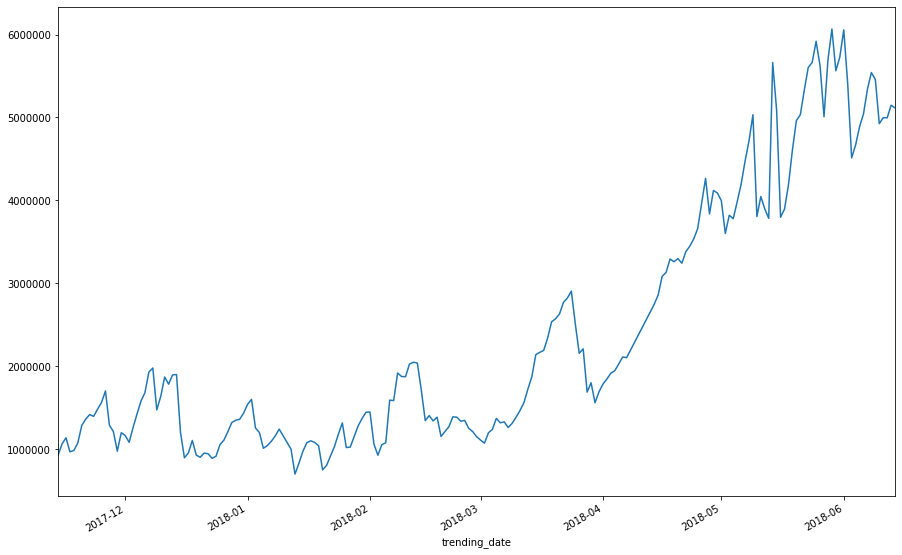

In [8]:
usData.groupby('trending_date')['views'].mean().plot(figsize=(15,10))

From this we can see that the average number of views a trending video has has gone up from 2017 to 2018

## All contries (comment count vs. Trending length)

In [9]:
allCountries = merge.allParcableCountryData()
allCountries['category'] = allCountries['category'].astype('category')
allCountries['country'] = allCountries['country'].astype('category')

In [30]:
top = allCountries.groupby(['video_id', 'title'])
topTrending = pd.DataFrame({},columns=['count'])
topTrending['count'] = top['trending_date'].count().sort_values(ascending=False)
topTrending['comments'] = top['comment_count'].max()
topTrending.head(1)

,,count,comments
video_id,title,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official Video),80,553371


In [58]:
# averages = pd.DataFrame({},columns=['AvgCount'])
# groupedTrending = topTrending.groupby('count')
# #averages['AvgCount'] = groupedTrending['']
# groupedTrending.head(1)

count = pd.Series([])
numVids = pd.Series([])
comments = pd.Series([])

for i in np.arange(1,100):
    numVideos = 0;
    totalComments = 0;
    
    numVideos = topTrending[topTrending['count'] == i].count()['count']
    totalComments = topTrending[topTrending['count'] == i]['comments'].sum()
    
    count.set_value(i,i)
    numVids.set_value(i,numVideos)
    comments.set_value(i,totalComments)
    
dictionary = {'count': count, 'NumberOfVideos': numVids, 'TotalComments': comments}
df = pd.DataFrame(dictionary)

C:\Users\bathtj\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bathtj\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\bathtj\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [73]:
df.head(10)

,count,NumberOfVideos,TotalComments
1,1,81448,44963142
2,2,22877,34899158
3,3,8660,20563129
4,4,3920,10951724
5,5,2156,8205449
6,6,1419,6329621
7,7,960,4473923
8,8,682,4078514
9,9,554,3878170
10,10,426,2541215


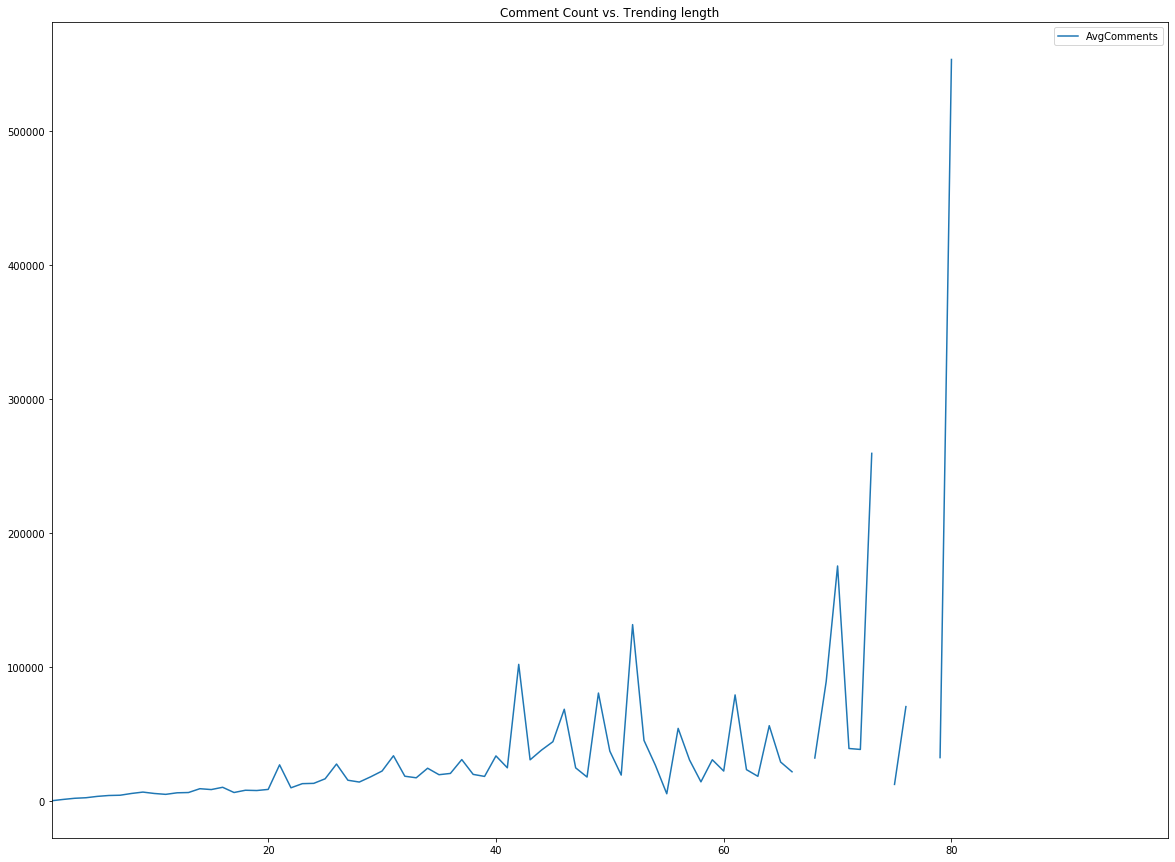

In [74]:
# graph of the number of days trending vs avg comments
DaysTrendingAndAvgComments = pd.DataFrame()
DaysTrendingAndAvgComments['AvgComments'] = (df.TotalComments / df.NumberOfVideos)
DaysTrendingAndAvgComments.plot(figsize=(20,15),title="Comment Count vs. Trending length")